In [9]:
# Data analysis & visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully.")



All libraries imported successfully.


In [10]:
# Load the dataset
df = pd.read_csv("final_dataset.csv")

# View the first few rows
df.head()


,Unnamed: 0,beds,baths,size,zip_code,price
0,0,3,2.5,2590.0,98144,795000.0
1,1,4,2.0,2240.0,98106,915000.0
2,2,4,3.0,2040.0,98107,950000.0
3,3,4,3.0,3800.0,98199,1950000.0
4,4,2,2.0,1042.0,98102,950000.0


In [11]:
# Basic dataset info
df.info()

# Statistical summary of numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2016 non-null   int64  
 1   beds        2016 non-null   int64  
 2   baths       2016 non-null   float64
 3   size        2016 non-null   float64
 4   zip_code    2016 non-null   int64  
 5   price       2016 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 94.6 KB


,Unnamed: 0,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,1007.500000,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,582.113391,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,0.000000,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,503.750000,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,1007.500000,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,1511.250000,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,2015.000000,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [12]:
# Missing values in each column
print("Missing values:\n", df.isnull().sum())

# Number of duplicate rows
print("Duplicate rows:", df.duplicated().sum())


Missing values:
 Unnamed: 0    0
beds          0
baths         0
size          0
zip_code      0
price         0
dtype: int64
Duplicate rows: 0


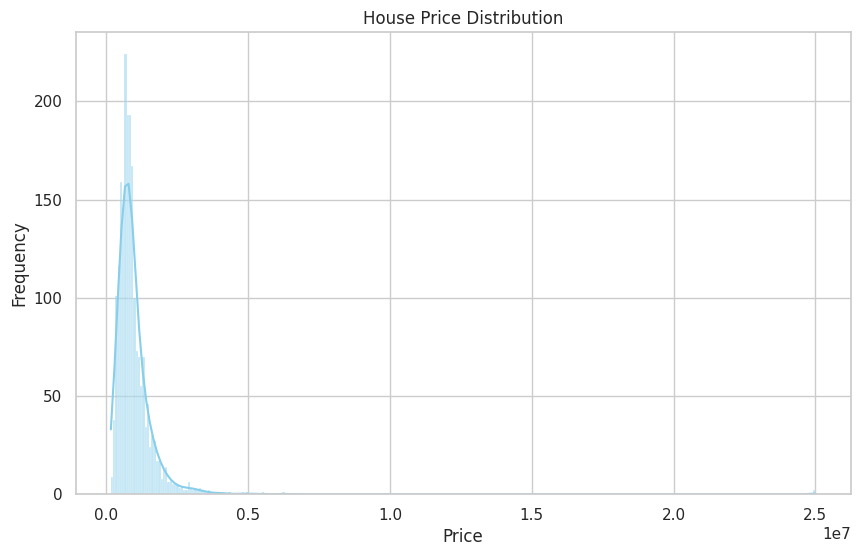

In [13]:
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title("House Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


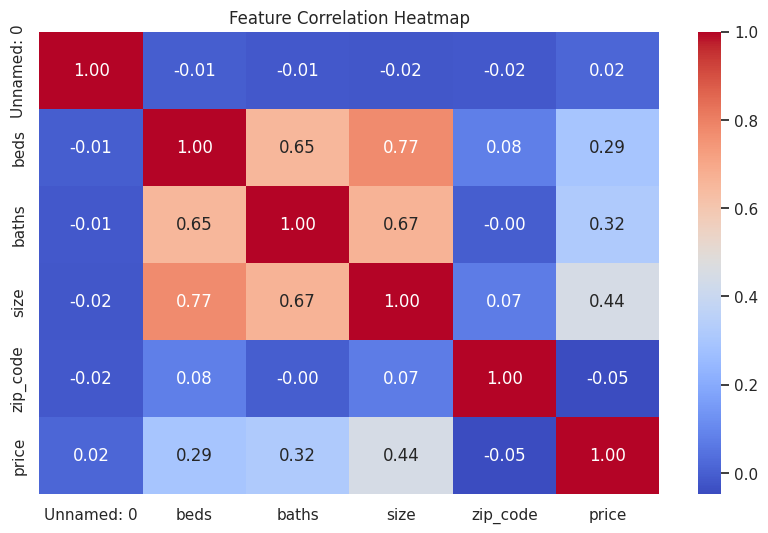

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


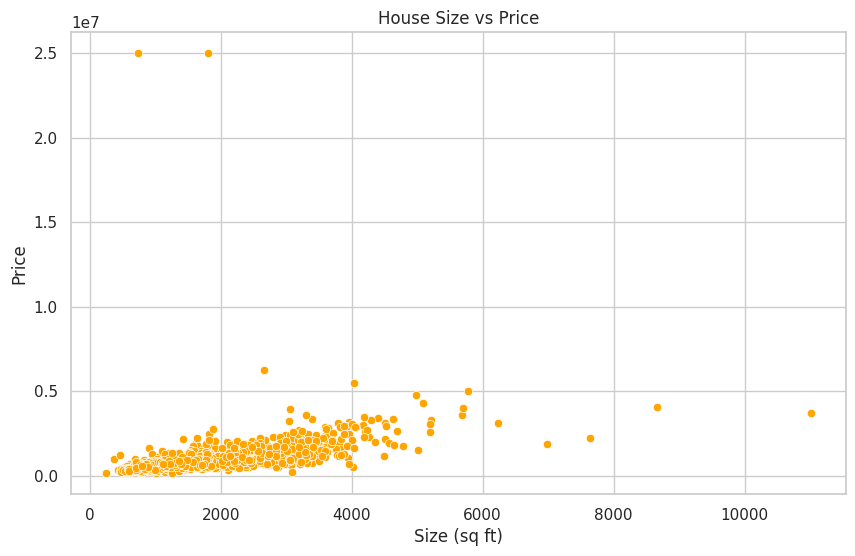

In [15]:
sns.scatterplot(x='size', y='price', data=df, color='orange')
plt.title("House Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price")
plt.show()


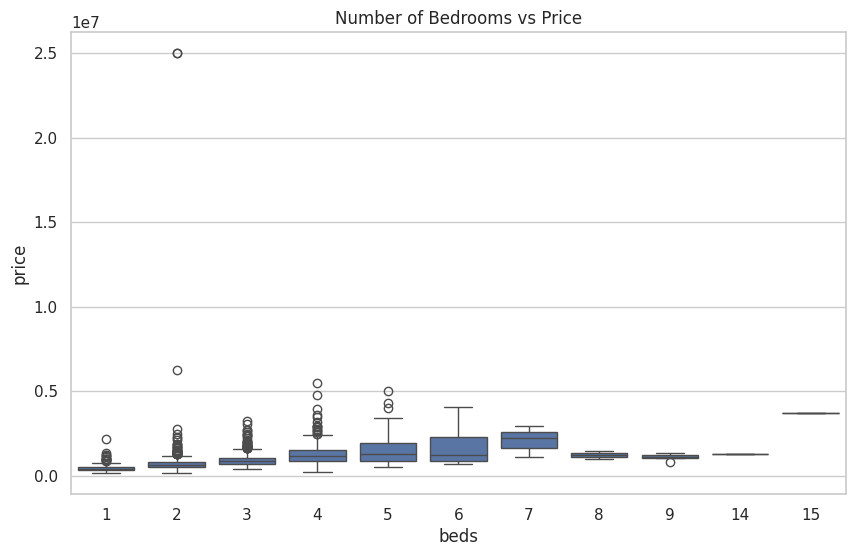

In [16]:
sns.boxplot(x='beds', y='price', data=df)
plt.title("Number of Bedrooms vs Price")
plt.show()


In [17]:
# Select input features and target variable
X = df[['beds', 'baths', 'size', 'zip_code']]   # Independent variables
y = df['price']                                 # Dependent variable (target)


In [18]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1612, 4)
Test set size: (404, 4)


In [19]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Print model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")


Intercept: 309146000.7556115
Coefficients:
beds: -95351.71
baths: 41432.51
size: 522.50
zip_code: -3148.10


In [22]:
# Make predictions
y_pred = model.predict(X_test)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 136044306353.70824
R² Score: 0.587486881294393


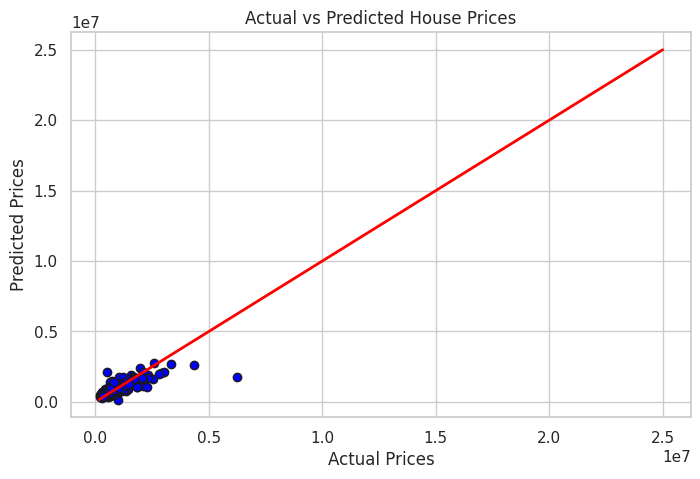

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


## 🧠 Final Insights & Observations:

- The Linear Regression model was trained to predict house prices based on features like number of bedrooms, bathrooms, size, and zip code.
- The number of bedrooms and total size of the house showed a strong positive influence on house price.
- The model performed reasonably well with an R² score indicating that a good portion of the variance in house prices was explained by the input features.
- Some outliers and regional variations (via zip code) may have impacted prediction accuracy.
- Overall, this was a strong foundational regression model and can be enhanced further with feature engineering and location-specific data.
